<a href="https://colab.research.google.com/github/kahakashanashraf/machine-learning/blob/main/MLP_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
# fashion_mnist, cifar10, cifar100
import matplotlib.pyplot as plt

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
{0:1, 1:2, 'name': 'moumita', 'section':1}

{0: 1, 1: 2, 'name': 'moumita', 'section': 1}

In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train.shape[0]

60000

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
indexes

array([41559, 16534, 29127, 10352,  1689, 51355, 22398, 34790, 52028,
       32297, 38753, 29691, 19173, 10776, 17151, 34539, 52699,  4244,
       27970, 39041, 55977, 56764, 11828, 33260, 25446])

In [ ]:
# sample 25 mnist digits from train dataset
images = x_train[indexes]
labels = y_train[indexes]

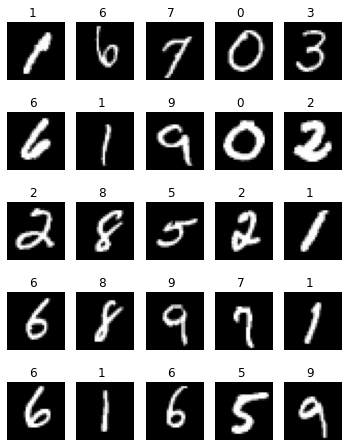

In [ ]:
plt.figure(figsize=(6,8))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.text(10, -3, labels[i], fontsize=12)
    plt.axis('off')

plt.show()
plt.close('all')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
y_train


# 0 1 2 3 4 5 6 8 9
# 0 0 0 0 0 1 0 0 0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
60,000 28 28 3

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



((60000, 10), (10000, 10))

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size


In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [ ]:
batch_size = 128
# 16 32 64 128 256
hidden_units = 256

In [ ]:
0.1 0.2 0.4 0.5 0.1 0.06 ...... = 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

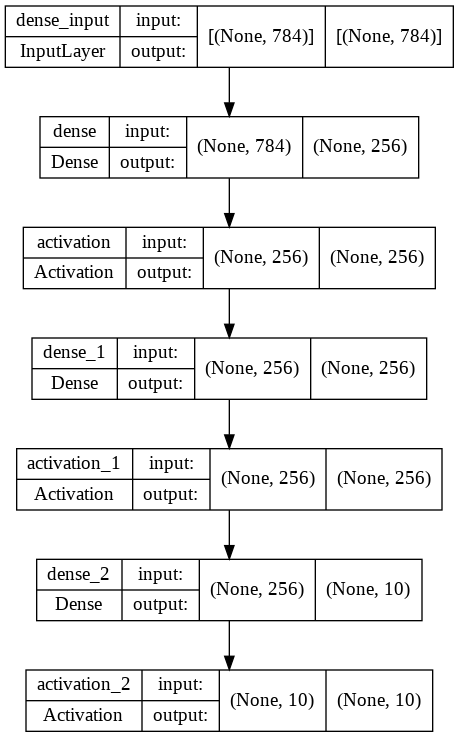

In [ ]:

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)



Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.2551 - accuracy: 0.9255
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9718
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0631 - accuracy: 0.9805
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0447 - accuracy: 0.9861
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - accuracy: 0.9953
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0130 - accuracy: 0.9957

In [ ]:
# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size = batch_size, verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.0%


In [ ]:
0.2  0.05  0.1  0.1  0.05  0.2  0.8  0.9  0.3  0.2  0.4 = 1